# PART 1

## Table and Dust Maps

- Below is the total, combined code that will import and display a table from excel and then select data such that the dust maps can be created.
- Included in the code are explanations such that the code is easier to understand upon reviewing.
 - in """ """

In [1]:
"""Importing environments"""

"""PART1"""
#!pip install astroquery
import pandas
from astropy.table import Table
import numpy as np
from astroquery.irsa_dust import IrsaDust
import astropy.units as u
import astropy.coordinates as coord
#!pip install pandas xlrd

"""PART2"""
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astroquery.skyview import SkyView


"""import excel spreedsheet as pandas DataFrame"""
df= pandas.read_excel('New_PART4.xlsx')
"""NOTE!: document named 'New_PART4.xlsx' must be saved in the same directory"""
"""an extra way to create this table is the following(but is not used)
#t=Table.from_pandas(df)
#t"""
df

,NAME,FIELD,l (gal),b (gal),RA (eq.),Dec (eq.),Mean E(B-V),STD E(B-V),STD E(B-V).1,A_g (mag),A_r (mag),Mean dust,STD dust,Notes,Notes (Extra)
0,"Linear Cluster, Abell 194",01-02,142.066,-62.9999,01 26 01.3,-01 22 02,0.0371,0.00864,0.00864,0.140720,0.102025,0.0371,0.00864,"""",Z = 0.018
1,"LGG, NGC 988",02-08,179.933,-58.8207,02 35 27.730,-09 21 21.61,0.02797,0.00394,0.00394,0.106090,0.076917,0.02797,0.00394,Excellent,"1500km/s, Brough et al 2006, Kilborn et al 2009"
2,Fornax Group,03-35,235.97,-54.1523,03 38 30.0,-35 27 18,0.01122,0.00275,0.00275,0.042557,0.030855,0.01122,0.00275,Best,NaN
3,Eridanus Cluster,03-20,210.49,-53.1273,00 30 00.0,-21 30 00,0.0377,0.01498,0.01498,0.142996,0.103675,0.0377,0.01498,"strong gradients, not so good",NaN
4,Doradus Group,04-56,265.823,-43.3838,04 20 00.6,-54 56 17,0.01362,0.00516,0.00516,0.051661,0.037455,0.01362,0.00516,Perfect,NaN
5,HIPASS cube H051,05-60,268.748,-37.5303,04 57 00,-2 28 44.98,0.021315,0.00568,0.00568,0.080848,0.058616,0.021315,0.00568,"""","centre field @ 04:57, -59:30"
6,HCG 44,10+21,214.401,54.5801,10 18 00,21 48 42,0.02521,0.00451,0.00451,0.095622,0.069328,0.02521,0.00451,"""",NaN
7,Hydra Cluster,10-27,204.583,51.8363,10 36 36.0,-27 31 04,0.02844,0.00672,0.00672,0.107873,0.078210,0.02844,0.00672,"""","52Mpc, Gal. Latitude 26d"
8,Antlia group,10-35,272.948,19.1874,10 29 41.1,-35 19 33,0.08287,0.01643,0.01643,0.314326,0.227892,0.08287,0.01643,NaN,NaN
9,HIPASS cube H212,11-26,284.505,34.4471,11 44 00,-26 00 00,0.06249,0.01527,0.01527,0.237025,0.171847,0.06249,0.01527,NaN,many HIPASS detections


- the below cell forms dust map images

In [2]:
"""taking an array of the 'name', 'l(gal)' and 'b(gal)' column values such that it comes out as a list"""
name=np.array(df[df.columns[0]])
RA=np.array(df[df.columns[4]])
DEC=np.array(df[df.columns[5]])

"""downloading dust maps and saving them to the same location as this file"""
fox=[]
bit=[]
"""created a list for the coordinates: [1RA,1DEC, 2RA,2DEC,...]. Called it bit"""
for i in range(0,len(df)-1):
    bob=RA[i],DEC[i]
    fox.append(bob)
    for x in fox[i]:
        bit.append(x)

for i in range(0, int(len(bit)/2)):
    #coordinates= "%s %s" %(bit[2*i], bit[2*i+1]) - (just a reminder of the coordinate position code on next line)
    #BELOW: contains (bit[2*i], bit[2*i+1]) which will select the coordinate combinations appropriately.
    image = IrsaDust.get_images("%s %s" %(bit[2*i], bit[2*i+1]), image_type="ebv", radius=2.6 * u.deg)
    """finding and downloading appropriate dust images at specific coordinates (RA and DEC)"""
    """NOTE: write to fits files. will fault if file exists"""
    """writing '.fits' image to same location as this file"""
    image[0].writeto('dust_%s.fits' %(name[i]),clobber=True)

# PART 2

- Below is the total, combined code that will draw the appropriate columns from the table and allow the creation of an optical image for each target.
- Included in the code are explanations such that the code is easier to understand upon reviewing.
 - in  """ """

In [3]:
for i in range(0, int(len(bit)/2)):
    path1 = SkyView.get_images(position="%s %s" %(bit[2*i], bit[2*i+1]), survey=['DSS'], radius=2.6 * u.deg) #Huntsman Field of View
    path2 = SkyView.get_images(position="%s %s" %(bit[2*i], bit[2*i+1]), survey=['DSS']) #closer images
    """finding and downloading appropriate optical images through specific coordinate (RA and DEC) input"""
    path1[0].writeto('image(2.6)_%s.fits' %(name[i]),clobber=True)
    path2[0].writeto('image(closer)_%s.fits' %(name[i]),clobber=True)

# PART 3

In [4]:
"""PART3"""
from astropy.io import fits as pyfits
import glob
from matplotlib import pyplot as plt
%matplotlib inline
#!pip install aplpy
import aplpy


## Displaying Optical Images

- This is the initial code that I did. As seen, the images overlap and therefore we can only see the last image of the set :(

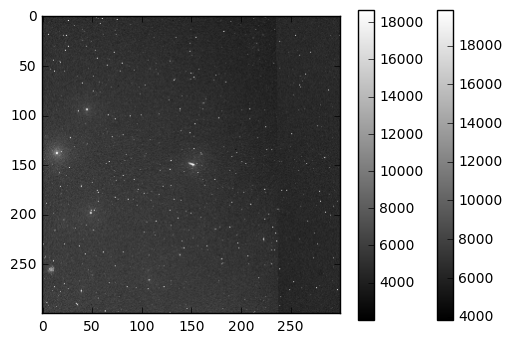

In [5]:
dat=[]
optical=[]
"""importing images"""
for i in range(0,len(name)-1):
    image_file=glob.glob('image(2.6)_%s.fits' %(name[i]))
    dat.append(image_file)

"""changing to an list"""
sam=[]
for i in range (0,len(name)-1):
    for x in dat[i]:
        sam.append(x)

"""creating arrays"""
for f in sam:
    optical.append(np.array(pyfits.open(f)[0].data, dtype=float))

"""showing/saving images"""
for i in range (0,2): #error occurs: images overlap and therefore we can not see it. At this stade the range (0,2) has 2 overlapping plots
    plt.imshow(optical[i], cmap='gray')
    plt.colorbar()
    #To save images:
    #plt.savefig('matlabplot_%s.jpg' %(name[i]))
    #plt.close()

- Works: all images appear and are not overlapped :)

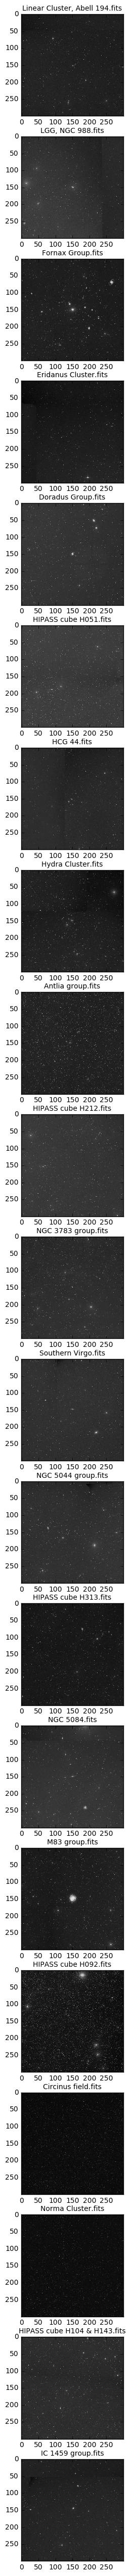

In [6]:
datash=[]
opticals=[]
"""importing images"""
for i in range(0,len(name)-1):
    image_file=glob.glob('image(2.6)_%s.fits' %(name[i]))
    datash.append(image_file)

"""changing to an list"""
sam=[]
for i in range (0,len(name)-1):
    for x in datash[i]:
        sam.append(x)

"""creating arrays"""
for f in sam:
    opticals.append(np.array(pyfits.open(f)[0].data, dtype=float))

"""showing/saving images"""
fig,ax = plt.subplots(nrows=len(name)-1,figsize=(40,65))
for i in range(0,len(name)-1):
    plot = ax[i].imshow(opticals[i].data,cmap='gray') #show image
    ax[i].set_title('%s.fits' %(name[i]), fontsize=10) #name assigned to image

## Displaying Dust Maps

- This is the initial code that I did. As seen, the dust maps overlap and therefore we can only see the last map of the set :(

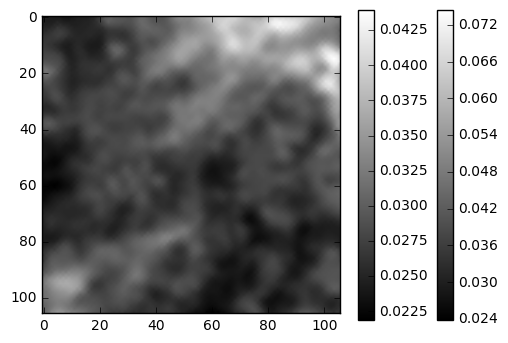

In [7]:
datas=[]
dust=[]
"""importing images"""
for i in range(0,len(name)-1):
    image_file=glob.glob('dust_%s.fits' %(name[i]))
    datas.append(image_file)

"""changing to an list"""
sam=[]
for i in range (0,len(name)-1):
    for x in datas[i]:
        sam.append(x)

"""creating arrays"""
for f in sam:
    dust.append(np.array(pyfits.open(f)[0].data, dtype=float))

"""showing/saving images"""
for i in range (0,2): #error occurs: images overlap and therefore we can not see it. At this stade the range (0,2) has 2 overlapping plots
    plt.imshow(dust[i], cmap='gray')
    plt.colorbar()
    #To save images:
    #plt.savefig('matlabplot_%s.jpg' %(name[i]))
    #plt.close()

- Works: all maps appear and are not overlapped :)

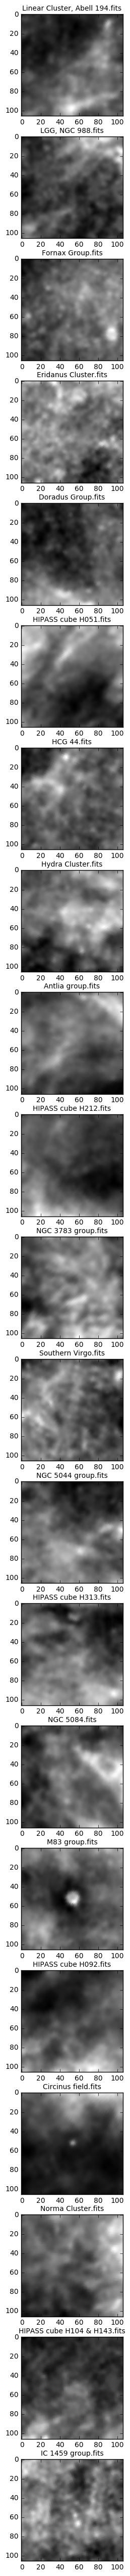

In [8]:
da=[]
dusts=[]
"""importing images"""
for i in range(0,len(name)-1):
    image_file=glob.glob('dust_%s.fits' %(name[i]))
    da.append(image_file)

"""changing to an list"""
sam=[]
for i in range (0,len(name)-1):
    for x in da[i]:
        sam.append(x)

"""creating arrays"""
for f in sam:
    dusts.append(np.array(pyfits.open(f)[0].data, dtype=float))

"""showing/saving images"""
fig,ax = plt.subplots(nrows=len(name)-1,figsize=(40,65))
for i in range(0,len(name)-1):
    plot = ax[i].imshow(dusts[i].data,cmap='gray') #show image
    ax[i].set_title('%s.fits' %(name[i]), fontsize=10) #name assigned to image